In [0]:
#Import Tools
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import random
import matplotlib.pyplot as plt

#set random seed for reproduction's sake
np.random.seed(49)

In [0]:
#fetching the data from S&P 500 webpage
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

In [34]:
#getting the first element came from webscraping which is the tabular data
table = data[0]

#Getting the column names 
header = table.iloc[0]

#Now arranged the whole dataset with their proper names and values
corrected_table = table[0:]
corrected_table

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,reports,Industrials,Industrial Machinery,"White Plains, New York",2011-11-01,1524472,NaN
501,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,NaN
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,NaN
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,NaN


In [35]:
corrected_table.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [0]:
dtf = corrected_table['GICS Sector']
typ = dtf[1]

In [37]:
pf = dtf.value_counts()
pf

Industrials               70
Information Technology    69
Financials                67
Consumer Discretionary    64
Health Care               60
Consumer Staples          33
Real Estate               32
Utilities                 28
Energy                    28
Materials                 28
Communication Services    26
Name: GICS Sector, dtype: int64

In [38]:
#Getting the tickers which will help to fetch data from yahoo finance
tickers = corrected_table['Symbol'].tolist()
print (tickers)

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'COTY', 'CCI', 'CSX', 'CMI', 'CV

In [39]:
#Selecting randomly 5 tickers
selected = random.sample(tickers, 15)
selected

['ABC',
 'AMZN',
 'ROP',
 'EW',
 'GOOGL',
 'ORCL',
 'TRIP',
 'NDAQ',
 'AAP',
 'DOV',
 'DXC',
 'EMN',
 'HOG',
 'ROL',
 'COG']

In [0]:
# pull Adjusted closing prices with Pandas datareader and check the head of this data

table = pd.DataFrame()
count = 0

for item in selected:
    try:
        table[item] = web.DataReader(item, data_source='yahoo', start='2015-1-1' , end = '2017-12-31')['Adj Close']
    except:
        print(count,'th indexed data not available')
    
    count += 1

In [41]:
table.head()

,ABC,AMZN,ROP,EW,GOOGL,ORCL,TRIP,NDAQ,AAP,DOV,DXC,EMN,HOG,ROL,COG
Date,,,,,,,,,,,,,,,
2015-01-02,83.298584,308.519989,151.856567,63.860001,529.549988,41.001865,66.331062,43.582340,157.236282,50.988945,21.286510,67.018433,56.221970,13.198556,28.888161
2015-01-05,82.589546,302.190002,147.406174,63.889999,519.460022,40.426842,64.677017,43.354687,155.163757,49.210918,20.855738,64.705017,55.119579,13.186354,27.304594
2015-01-06,83.040749,295.290009,145.350601,63.509998,506.640015,40.009510,62.258183,43.327358,155.054657,48.977154,20.909586,64.433372,54.461567,12.978921,26.920691
2015-01-07,84.698250,298.420013,146.836578,65.000000,505.149994,40.018787,62.996277,43.946587,158.386612,49.380932,21.061031,64.021530,55.358868,13.263634,27.151035
2015-01-08,84.891624,300.459991,147.827209,66.574997,506.910004,40.259911,65.148331,44.629551,159.774918,50.386822,21.299976,66.001945,56.512535,13.560551,27.698084


In [0]:
# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

In [0]:
# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 1000000



In [0]:
# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

Text(0.5, 1.0, 'Efficient Frontier')

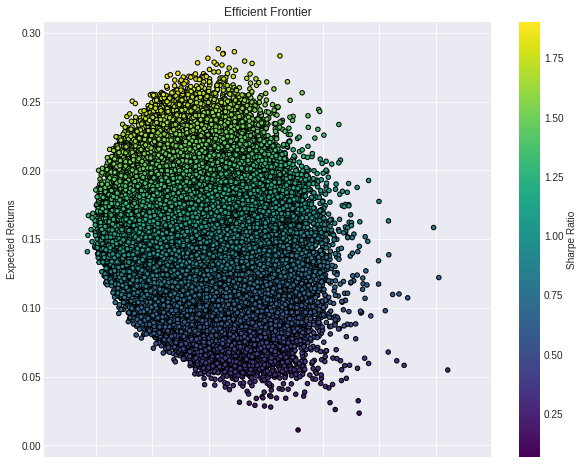

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='viridis', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')

In [46]:
df.head(15)

,Returns,Volatility,Sharpe Ratio,ABC Weight,AMZN Weight,ROP Weight,EW Weight,GOOGL Weight,ORCL Weight,TRIP Weight,NDAQ Weight,AAP Weight,DOV Weight,DXC Weight,EMN Weight,HOG Weight,ROL Weight,COG Weight
0,0.153635,0.144137,1.065899,0.032191,0.026425,0.099080,0.095365,0.073082,0.060633,0.058503,0.022507,0.082332,0.095860,0.077187,0.053349,0.047298,0.085827,0.090362
1,0.159685,0.145993,1.093785,0.032162,0.135049,0.008270,0.040681,0.043815,0.098519,0.099319,0.132363,0.085111,0.049859,0.059063,0.127236,0.035361,0.042518,0.010674
2,0.163963,0.143302,1.144181,0.026822,0.097119,0.089974,0.067957,0.105595,0.100242,0.091179,0.098240,0.071003,0.041919,0.062153,0.040251,0.051229,0.038547,0.017769
3,0.113897,0.150437,0.757106,0.126586,0.076814,0.116452,0.080318,0.000944,0.088803,0.108717,0.045244,0.003884,0.012841,0.036184,0.087297,0.117573,0.001438,0.096905
4,0.193829,0.144285,1.343374,0.015061,0.102039,0.068319,0.108740,0.029815,0.065302,0.057440,0.080687,0.068974,0.066003,0.106572,0.067005,0.073148,0.083668,0.007228
5,0.165472,0.141496,1.169444,0.111004,0.090196,0.114103,0.067242,0.000672,0.101989,0.071815,0.117323,0.016297,0.031910,0.094064,0.009122,0.084451,0.032231,0.057585
6,0.175952,0.148816,1.182345,0.059469,0.110146,0.064846,0.104752,0.077574,0.057251,0.070862,0.001299,0.044515,0.041982,0.081416,0.094628,0.044744,0.044761,0.101754
7,0.148972,0.139935,1.064579,0.104010,0.096301,0.043144,0.106401,0.069265,0.115762,0.052713,0.051412,0.037496,0.099199,0.007196,0.070199,0.042544,0.039454,0.064903
8,0.100581,0.148187,0.678745,0.054656,0.024172,0.025054,0.124042,0.098247,0.084945,0.109994,0.108252,0.084113,0.017428,0.008519,0.076419,0.044051,0.023418,0.116690
9,0.136705,0.142375,0.960180,0.070493,0.022072,0.103691,0.050026,0.004163,0.150126,0.087825,0.055815,0.039602,0.080309,0.090033,0.016264,0.095557,0.099388,0.034637


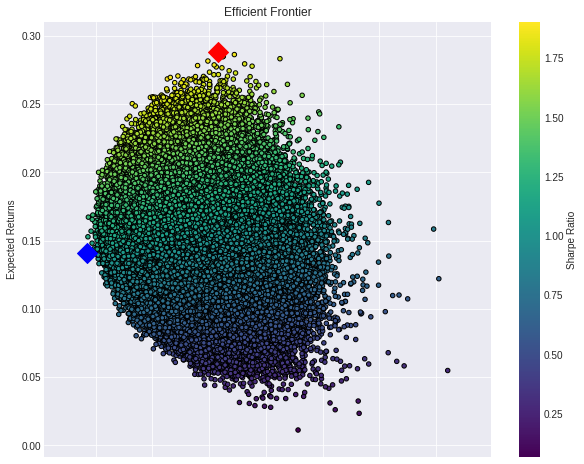

In [47]:
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()
median_sharpe = df['Sharpe Ratio'].median()
median_volatility = df['Volatility'].median()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]
median_sharpe_port = df.loc[df['Sharpe Ratio'].between(median_sharpe, median_sharpe+0.00001, inclusive=False)]
                                                                    
median_vol_port = df.loc[df['Volatility'].between(median_volatility, median_volatility+0.00001, inclusive=False)]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='viridis', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)

plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )

plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [48]:
sharpe_portfolio

,Returns,Volatility,Sharpe Ratio,ABC Weight,AMZN Weight,ROP Weight,EW Weight,GOOGL Weight,ORCL Weight,TRIP Weight,NDAQ Weight,AAP Weight,DOV Weight,DXC Weight,EMN Weight,HOG Weight,ROL Weight,COG Weight
808445,0.288447,0.151615,1.902498,0.007297,0.164912,0.160773,0.133058,0.093332,0.003247,0.002753,0.034738,0.013288,0.049795,0.153768,0.070718,0.021322,0.090765,0.000234


In [49]:
# print the details of the 2 special portfolios
print(min_variance_port.T)
print(sharpe_portfolio.T)

                319352
Returns       0.140874
Volatility    0.128519
Sharpe Ratio  1.096127
ABC Weight    0.137674
AMZN Weight   0.008920
ROP Weight    0.094707
EW Weight     0.033843
GOOGL Weight  0.037548
ORCL Weight   0.147295
TRIP Weight   0.035644
NDAQ Weight   0.171229
AAP Weight    0.069795
DOV Weight    0.021174
DXC Weight    0.015990
EMN Weight    0.003764
HOG Weight    0.007087
ROL Weight    0.178902
COG Weight    0.036428
                808445
Returns       0.288447
Volatility    0.151615
Sharpe Ratio  1.902498
ABC Weight    0.007297
AMZN Weight   0.164912
ROP Weight    0.160773
EW Weight     0.133058
GOOGL Weight  0.093332
ORCL Weight   0.003247
TRIP Weight   0.002753
NDAQ Weight   0.034738
AAP Weight    0.013288
DOV Weight    0.049795
DXC Weight    0.153768
EMN Weight    0.070718
HOG Weight    0.021322
ROL Weight    0.090765
COG Weight    0.000234
